In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


(150, 4)


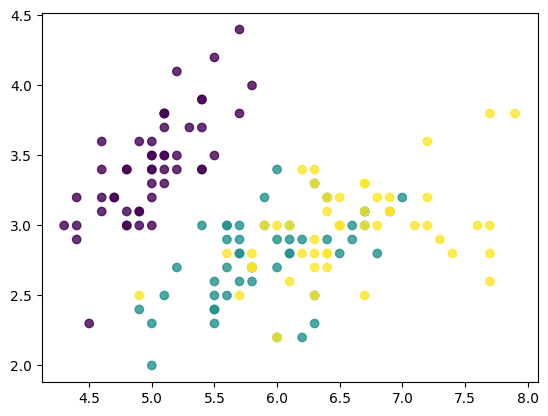

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Text(0.5, 1.0, 'Test set')

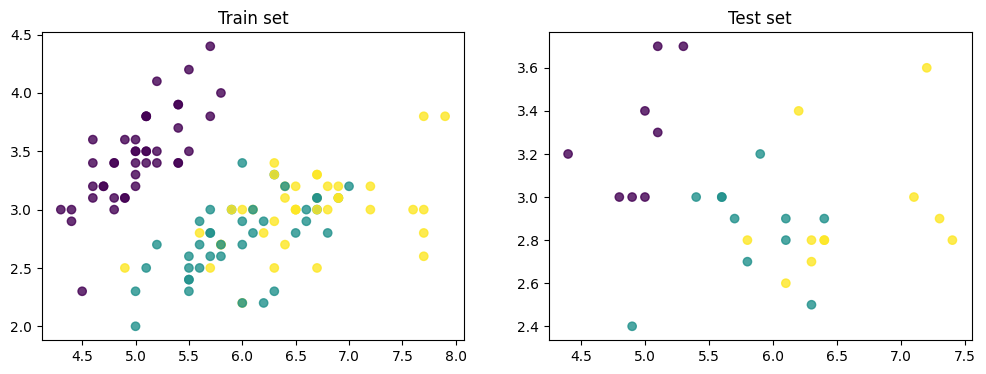

In [4]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title('Test set')

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 6)
model.fit(X_train, y_train)
print(f"Train score: {model.score(X_train, y_train)}")
print(f"Test score: {model.score(X_test, y_test)}")


Train score: 0.9833333333333333
Test score: 0.9666666666666667


In [6]:
from sklearn.model_selection import cross_val_score

cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

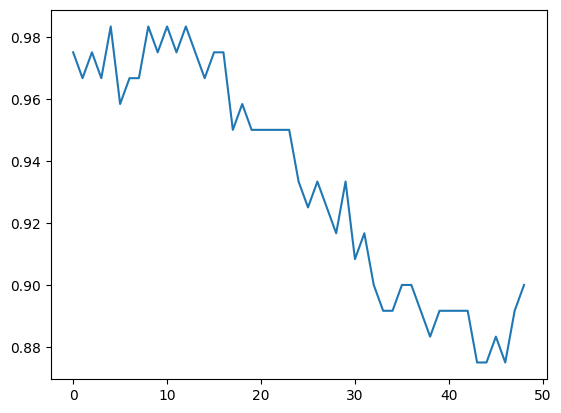

In [7]:
val_score = []
for i in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=i), X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
plt.plot(val_score)

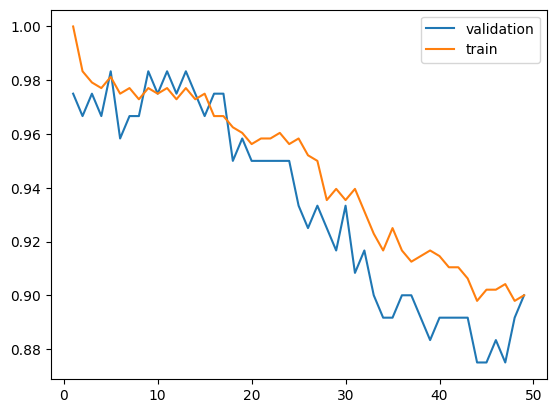

In [8]:
from sklearn.model_selection import validation_curve

model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')
plt.legend()

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1, 20),
    'metric': ['euclidean', 'manhattan']
             }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

grid.fit(X_train, y_train)
grid.best_score_

0.9833333333333334

In [10]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [11]:
model = grid.best_estimator_

model.score(X_test, y_test)

0.9333333333333333

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

[ 9 19 28 38 48 57 67 76 86 96]


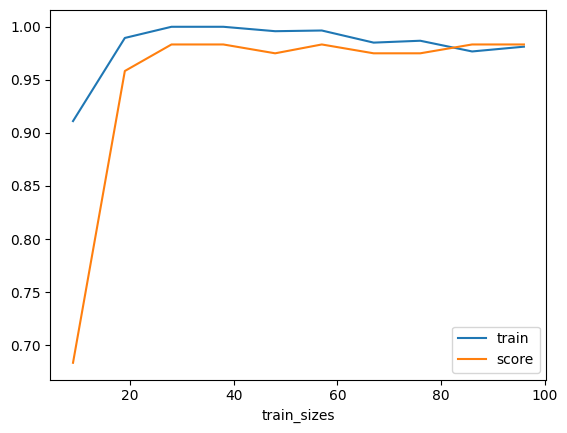

In [22]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='score')
plt.xlabel('train_sizes')
plt.legend()